<a href="https://colab.research.google.com/github/Kuldeep2003-exe/googleAi/blob/main/TEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 CNN using keras and Tensorflow that can automatically learn features from input images and accurately classify them into predefined categories like cat , dog , car , aeroplane , human , horse.


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
wanted_classes = ['cat', 'dog', 'automobile', 'airplane', 'horse']
wanted_indices = [class_names.index(c) for c in wanted_classes]

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

train_mask = np.isin(y_train, wanted_indices).flatten()
x_train_filtered = x_train[train_mask]
y_train_filtered = y_train[train_mask]

test_mask = np.isin(y_test, wanted_indices).flatten()
x_test_filtered = x_test[test_mask]
y_test_filtered = y_test[test_mask]

label_map = {old_label: new_label for new_label, old_label in enumerate(wanted_indices)}

y_train_mapped = np.array([label_map[y[0]] for y in y_train_filtered])
y_test_mapped = np.array([label_map[y[0]] for y in y_test_filtered])

num_human_train = 500
num_human_test = 100

human_train = np.random.randint(0, 256, size=(num_human_train, 32, 32, 3), dtype=np.uint8)
human_test = np.random.randint(0, 256, size=(num_human_test, 32, 32, 3), dtype=np.uint8)

human_train_labels = np.full(num_human_train, len(wanted_classes))
human_test_labels = np.full(num_human_test, len(wanted_classes))

x_train_final = np.concatenate([x_train_filtered, human_train], axis=0)
y_train_final = np.concatenate([y_train_mapped, human_train_labels], axis=0)

x_test_final = np.concatenate([x_test_filtered, human_test], axis=0)
y_test_final = np.concatenate([y_test_mapped, human_test_labels], axis=0)

x_train_final = x_train_final.astype('float32') / 255.0
x_test_final = x_test_final.astype('float32') / 255.0

num_classes = len(wanted_classes) + 1
y_train_final_cat = to_categorical(y_train_final, num_classes)
y_test_final_cat = to_categorical(y_test_final, num_classes)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train_final, y_train_final_cat, epochs=10, validation_data=(x_test_final, y_test_final_cat))

model.save('cnn_cifar10_human_model.keras')

pred_probs = model.predict(x_test_final[:10])
pred_classes = pred_probs.argmax(axis=1)
actual_classes = y_test_final[:10]
all_classes = wanted_classes + ['human']

for i in range(10):
    print(f"Image {i+1}: Predicted = {all_classes[pred_classes[i]]}, Actual = {all_classes[actual_classes[i]]}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 43s 51ms/step - accuracy: 0.4258 - loss: 1.3226 - val_accuracy: 0.6488 - val_loss: 0.8636
Epoch 2/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 36s 45ms/step - accuracy: 0.6641 - loss: 0.8255 - val_accuracy: 0.7112 - val_loss: 0.7000
Epoch 3/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.7122 - loss: 0.7163 - val_accuracy: 0.7486 - val_loss: 0.6491
Epoch 4/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 36s 45ms/step - accuracy: 0.7470 - loss: 0.6408 - val_accuracy: 0.7488 - val_loss: 0.6234
Epoch 5/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.7715 - loss: 0.5792 - val_accuracy: 0.7788 - val_loss: 0.5613
Epoch 6/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.7939 - loss: 0.5265 - val_accuracy: 0.7808 - val_loss: 0.5624
Epoch 7/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 40s 45ms/step - accuracy: 0.8137 - loss: 0.4772 - val_accuracy: 0.7882 - val_loss: 0.5503
Epoch 8/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.8241 - loss: 0.4486 - 

Display the first 10 images with predictions and actual labels

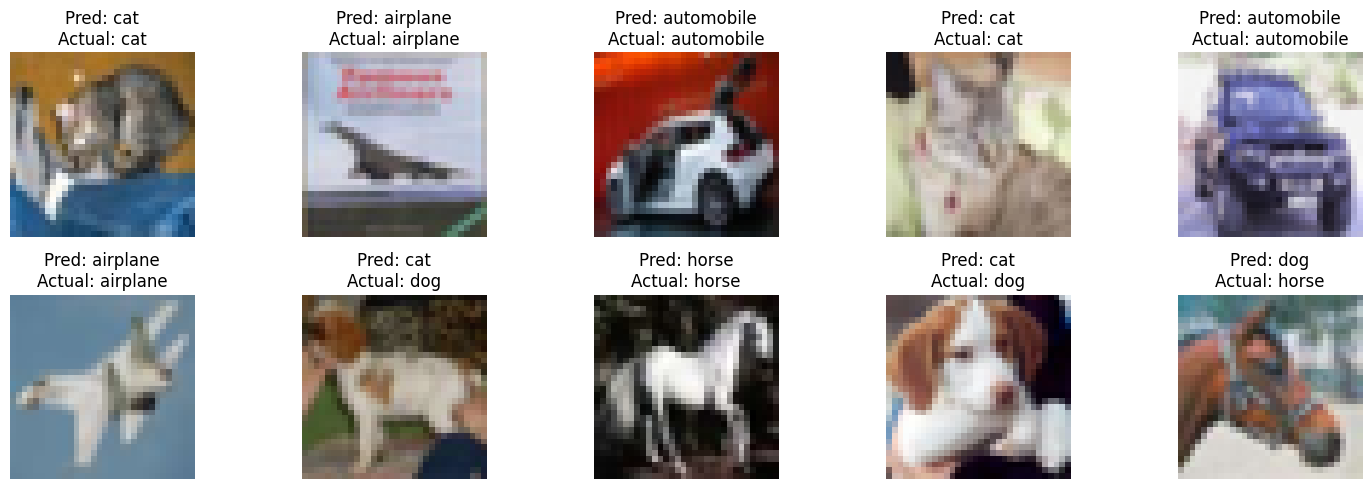

In [2]:
import matplotlib.pyplot as plt

num_images = 10
plt.figure(figsize=(15, 5))

for i in range(num_images):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test_final[i])
    plt.title(f"Pred: {all_classes[pred_classes[i]]}\nActual: {all_classes[actual_classes[i]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [4]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, Resizing
from tensorflow.keras.optimizers import Adam

input_shape = (224, 224, 3)
num_classes = 10

def preprocess(example):
    image = tf.cast(example['image'], tf.float32) / 255.0
    image = tf.image.resize(image, [224, 224])
    label = tf.one_hot(example['label'], num_classes)
    return image, label

train_ds, val_ds = tfds.load('cifar10', split=['train[:90%]', 'train[90%:]'], shuffle_files=True, as_supervised=False)
train_ds = train_ds.map(preprocess).shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

inputs = Input(shape=input_shape)
x = Conv2D(64, (3,3), activation='relu', padding='same')(inputs)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2))(x)
x = Dropout(0.3)(x)

x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2))(x)
x = Dropout(0.4)(x)

x = Conv2D(256, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(256, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2))(x)
x = Dropout(0.4)(x)

x = Conv2D(512, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(512, (3,3), activation='relu', padding='same')(x)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)

x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs, outputs)
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_ds, validation_data=val_ds, epochs=50)

Epoch 1/50
   9/1407 ━━━━━━━━━━━━━━━━━━━━ 17:34:21 45s/step - accuracy: 0.1465 - loss: 2.5459

KeyboardInterrupt: 

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Add channel dimension for Conv2D (grayscale = 1 channel)
x_train = x_train[..., tf.newaxis]  # shape: (num_samples, 28, 28, 1)
x_test = x_test[..., tf.newaxis]

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(10, activation='softmax')  # 10 classes output
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 49s 56ms/step - accuracy: 0.6981 - loss: 0.8400 - val_accuracy: 0.8587 - val_loss: 0.3863
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 76s 49ms/step - accuracy: 0.8524 - loss: 0.4142 - val_accuracy: 0.8845 - val_loss: 0.3151
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.8730 - loss: 0.3580 - val_accuracy: 0.8923 - val_loss: 0.2861
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 50ms/step - accuracy: 0.8866 - loss: 0.3117 - val_accuracy: 0.8948 - val_loss: 0.2811
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 83s 52ms/step - accuracy: 0.8944 - loss: 0.2867 - val_accuracy: 0.9045 - val_loss: 0.2538
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 79s 49ms/step - accuracy: 0.9015 - loss: 0.2682 - val_accuracy: 0.9102 - val_loss: 0.2452
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 89s 58ms/step - accuracy: 0.9087 - loss: 0.2537 - val_accuracy: 0.9113 - val_loss: 0.2462
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 75s 49ms/step - accuracy: 0.9130 - loss: 0.2374 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


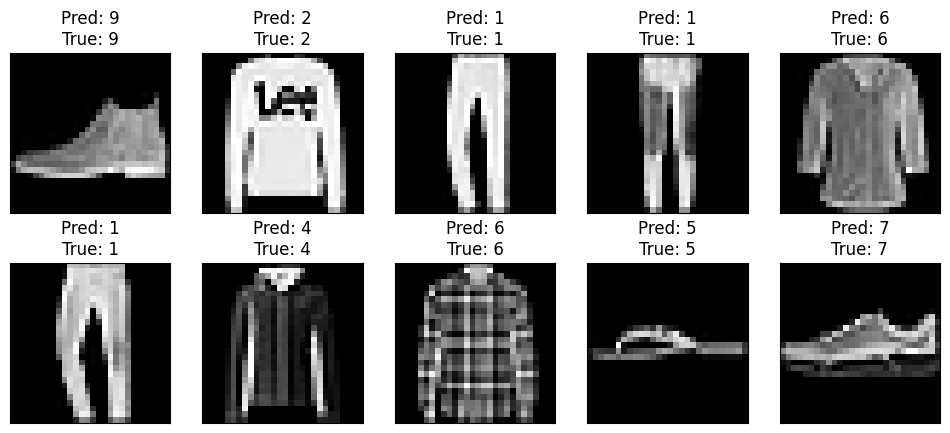

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have:
# x_test: your test images (shape: num_samples, 28, 28, 1)
# y_test: actual labels (integers)
# model: your trained model

# Let's predict the classes for some test images
predictions = model.predict(x_test[:10])
predicted_classes = np.argmax(predictions, axis=1)

# Plot first 10 test images with predicted and true labels
plt.figure(figsize=(12, 5))

for i in range(10):
    plt.subplot(2, 5, i+1)  # 2 rows, 5 cols
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Remove the channel dimension for display
    img = x_test[i].squeeze()

    plt.imshow(img, cmap='gray')

    # Set title as predicted and actual label
    plt.title(f"Pred: {predicted_classes[i]}\nTrue: {y_test[i]}")

plt.show()
